## Банки — Анализ оттока клиентов

## Материалы:  

### Презентация:    
https://disk.yandex.ru/i/1OMuJYSweXc54g  

### Дашборд (Набор №1):    
https://cutt.ly/Zz11A7I

### Задача:

Проанализировать данные клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

- Проведение исследовательского анализа данных
- Выделение портрета клиентов, которые склонны уходить из банка
- Формулировка и проверка статистических гипотез
- Построение моделей прогнозирования оттока клиентов
- Кластеризация клиентов  
- Общие выводы и рекомендации  

### Описание датасетов

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- 'userid' — идентификатор пользователя,
- 'score' — баллы кредитного скоринга,
- 'City' — город,
- 'Gender' — пол,
- 'Age' — возраст,
- 'Objects' — количество объектов в собственности,
- 'Balance' — баланс на счёте,
- 'Products' — количество продуктов, которыми пользуется клиент,
- 'CreditCard' — есть ли кредитная карта,
- 'Loyalty' — активный клиент,
- 'estimated_salary' — заработная плата клиента,
- 'Churn' — ушёл или нет.

<a id='back'><a/> 
# Задачи исследования
    
### [1. Изучение данных](#1)
    - импорт необходимых библиотек
    - чтение данных и сохранение в таблицу
    - изучение общих сведений о данных 
### [2. Предобработка данных](#2)  
    - проверка и замена типов данных
    - проверка данных на аномалии    
    - заполнение пропусков в данных
    - проврка на дубликаты
    - категоризация данных
### [3. Анализ данных (EDA)](#3)
#### [3.1 Анализ средних значений признаков и стандартного отклонения](#3.1) 
#### [3.2 Анализ средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался](#3.2)  
#### [3.3 Изучение распределений признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#3.3)  
#### [3.4 Изучение распределений признаков без привязки к признаку ухода в отток)](#3.4)        
#### [3.5 Корреляционный анализ](#3.5)    
### [4. Выведение портрета клиентов, которые склонны и не склонны уходить из банка на основе EDA](#4)
### [5. Проверка гипотез](#5)
#### [5.1 Гипотеза о различии дохода между теми клиентами, которые ушли и теми, которые остались](#5.1)     
#### [5.2 Гипотеза о различии возраста между теми клиентами, которые ушли и теми, которые остались](#5.2)    
### [6. Прогнозирование оттока клиентов](#6)  
#### [6.1 Построение модели прогнозирования оттока клиентов](#6.1)
#### [6.1.1 Анализ приоритезации признаков модели](#6.1.1)    
#### [6.2 Кластеризация клиентов](#6.2)
    - Подбор оптимального количества кластеров
### [7. Общие выводы и рекомендации](#7)  

<a id='1'><a/> 
## 1. Изучение данных
[Назад к оглавлению](#back)

In [1]:
#импортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('/datasets/bank_dataset.csv')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(14,7)})

df.head(20)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,nan,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,nan,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
5,15616748,645,Рыбинск,М,44,8,"113,755.78",2,1,0,"149,756.71",1
6,15635267,822,Ярославль,М,50,7,nan,2,1,1,"10,062.80",0
7,15698884,376,Ростов Великий,Ж,29,4,"115,046.74",4,1,0,"119,346.88",1
8,15835101,501,Ярославль,М,44,4,"142,051.07",2,0,1,"74,940.50",0
9,15635125,684,Ярославль,М,27,2,"134,603.88",1,1,1,"71,725.73",0


In [7]:
df.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","6,383.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"119,827.49",1.53,0.71,0.52,"100,090.24",0.20
std,"71,936.19",96.65,10.49,2.89,"30,095.06",0.58,0.46,0.50,"57,510.49",0.40
min,"15,608,437.00",350.00,18.00,0.00,"3,768.69",1.00,0.00,0.00,11.58,0.00
25%,"15,671,264.25",584.00,32.00,3.00,"100,181.98",1.00,0.00,0.00,"51,002.11",0.00
50%,"15,733,474.00",652.00,37.00,5.00,"119,839.69",1.00,1.00,1.00,"100,193.91",0.00
75%,"15,795,969.75",718.00,44.00,7.00,"139,512.29",2.00,1.00,1.00,"149,388.25",0.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Вывод  

В датасете 10 000 строк, отсутствующие значения есть только в столбце 'Balance' с данными о балансе на счете клиента. Причина появления данных пропусков может иметь технический характер, если что-то произошло при выгрузке или же клиент не имеет дебетовой карты и отображается в базе таким образом. В данном случае стоит обратиться в технический отдел, чтобы прояснить ситуацию. Так же посмотрим, является ли такой сбой характерным для определенных признаков(например, конкретный город). С типами данных все в порядке. Можно приступать к предобработке данных.

<a id='2'><a/> 
## 2. Предобработка данных
[Назад к оглавлению](#back)

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.rename(columns = {'userid':'user_id'}, inplace = True)

Проверим количество уникальных клиентов в датасете

In [11]:
len(df['user_id'].unique())

10000

Каждая строка в датасете это данные по уникальному клиенту.

In [12]:
print('Минимальный балл кредитного скоринга:', df['score'].min())
print('Максимальный балл кредитного скоринга:', df['score'].max())

Минимальный балл кредитного скоринга: 350
Максимальный балл кредитного скоринга: 850


В данном случае используется система скоринга 300-850. Так же бывают другие вариации баллов, однако в любой системе клиенту для одобрения кредита необходимо иметь не менее 600 баллов.

In [13]:
df['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

In [14]:
print('Минимальный возраст клиента:', df['age'].min())
print('Максимальный возраст клиента:', df['age'].max())

Минимальный возраст клиента: 18
Максимальный возраст клиента: 92


Все клиенты в данной выборке - совершеннолетние и "человеческого возраста", проблем с данными нет.

In [15]:
print('Минимальный зароботная плата клиента:', df['estimated_salary'].min())
print('Максимальный зароботная плата клиента:', df['estimated_salary'].max())

Минимальный зароботная плата клиента: 11.58
Максимальный зароботная плата клиента: 199992.48


Минимальная заработная плата выглядит слишком низкой. С 1 января 2021 года минимальная заработная плата в России составляет 12 792 руб, однако, могут быть ситуации, когда человек получает пенсию по инвалидности или является домохозяйкой. Возможно, человек предоставляет изредка какиой-то вид услуг, варианты могут быть разные. Так же возможен вариант, что данные не были предоставлены и значения были получены при расчетах специальной моделью. Посмотрим на данные в нашей выборке, где зп ниже минимальной по стране.

In [16]:
df_salary = df[df['estimated_salary'] < 12792]
df_salary.sample(10)

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
1607,15691457,711,Ярославль,М,64,4,nan,2,1,1,"3,185.67",0
3420,15697255,680,Ярославль,М,31,1,nan,2,1,1,"3,148.20",0
6839,15811018,724,Ростов Великий,М,36,6,"94,615.11",2,1,1,"10,627.21",0
4383,15843520,645,Ярославль,М,42,4,"98,298.18",1,1,1,676.06,0
6122,15620049,619,Ярославль,М,44,3,"116,967.68",1,1,0,"5,075.17",1
5280,15736865,569,Ростов Великий,Ж,28,3,"100,032.52",1,1,0,"5,159.21",1
8355,15738037,504,Рыбинск,М,44,4,"113,522.64",1,1,1,"12,405.20",0
825,15703338,464,Ростов Великий,М,33,8,"164,284.72",2,1,1,"3,710.34",0
5303,15688502,634,Рыбинск,М,25,9,nan,2,1,1,"8,227.91",0
1882,15749850,831,Ярославль,М,30,2,nan,2,0,1,"3,430.38",0


In [17]:
len(df_salary)

640

В данной выборке 640 строк с клиентами, чья заработная плата меньше минимальной по стране.

In [18]:
df_salary['city'].value_counts()

Ярославль         319
Рыбинск           164
Ростов Великий    157
Name: city, dtype: int64

Клиенты с зп меньше минимальной в большей массе проживают в Ярославле.

In [19]:
df['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

В данной выборке около половины клиентв проживает в Ярославле.

In [20]:
df_salary['churn'].value_counts()

0    517
1    123
Name: churn, dtype: int64

Среди таких клиентов 123 ушло в отток.

In [21]:
df_salary.describe()

,user_id,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,640.00,640.00,640.00,640.00,377.00,640.00,640.00,640.00,640.00,640.00
mean,"15,732,565.08",644.55,38.51,4.83,"117,854.15",1.55,0.67,0.52,"6,276.61",0.19
std,"71,797.97",99.84,10.44,2.85,"28,395.86",0.58,0.47,0.50,"3,714.44",0.39
min,"15,608,947.00",412.00,18.00,0.00,"27,517.15",1.00,0.00,0.00,11.58,0.00
25%,"15,673,556.00",577.75,31.00,2.00,"98,298.18",1.00,0.00,0.00,"3,153.49",0.00
50%,"15,731,724.00",645.00,37.00,5.00,"117,715.84",2.00,1.00,1.00,"6,121.99",0.00
75%,"15,792,972.00",710.00,43.00,7.00,"137,390.11",2.00,1.00,1.00,"9,554.05",0.00
max,"15,858,164.00",850.00,77.00,10.00,"204,510.94",4.00,1.00,1.00,"12,766.74",1.00


Среди таких клиентов средняя заработная плата составляет около 6 000 руб, однако, на счету у них лежит в среднем более 100 000 руб и в собственности в среднем 4 объекта. 

Посмотрим на клиентов, чей доход меньше 500р.

In [22]:
df_salary[df_salary['estimated_salary'] < 500]

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
393,15727284,556,Рыбинск,М,38,8,nan,2,0,0,417.41,1
396,15627502,557,Ярославль,М,33,3,"54,503.55",1,1,1,371.05,0
925,15679467,714,Ростов Великий,Ж,36,1,"101,609.01",2,1,1,447.73,0
1451,15726934,551,Ярославль,Ж,38,10,nan,2,1,1,216.27,0
1462,15608947,616,Ростов Великий,Ж,41,1,"103,560.57",1,1,0,236.45,1
2046,15776165,520,Ростов Великий,М,34,8,"120,018.86",2,1,1,343.38,0
2362,15833789,709,Ростов Великий,М,45,4,"122,917.71",1,1,1,11.58,1
2498,15691471,718,Ярославль,М,37,8,nan,2,1,1,142.81,0
3446,15807390,649,Ярославль,М,37,9,"87,374.88",2,1,1,247.36,0
4774,15683157,811,Ярославль,Ж,35,7,nan,1,1,1,178.19,0


В целом в масштабе данной выборки 640 строк это незначительно. Любопытно, что у клиентов чей доход меньше 500р на счету лежат довольно крупные суммы. Стоит обратить внимание на эту аномалию и изучить вопрос. Возможно, если эти данные результат заполнения отсутствия данных некой моделью, то ее стоит доработать.

In [23]:
df['balance'].isna().sum()

3617

В столбце с балансом 3617 строк с отсутствующими значениями.

In [24]:
df['balance'].min()

3768.69

Минимальный баланс составляет 3768.69 рублей.

Данные с пропусками это почти треть выборки, это довольно много, удалив эти данные мы потерям ценные данные. Предположительно природа этих пропусков заключается в отсутствии у клиента дебетовой карты и система распознает их таким образом, что можно приравнять к нулевому балансу. Следовательно, заменим пропуски на нули.

In [25]:
df['balance'].replace(np.nan, 0, inplace=True)

Создадим отдельный столбец с новым признаком, который будет отображать что действующего счета у клиента нет. В данном случае нулевой баланс равный нулю будет свидетельствовать, что действующего счета нет.

In [26]:
df['is_account'] = df['balance'].copy() 
df.is_account = df.is_account.astype(np.int64)
df.loc[(df['is_account'] != 0), 'is_account'] = 1

In [27]:
df.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,"101,348.88",1,0
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0,1
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,"93,826.63",0,0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0,1


Cоздадим отдельный датафрейм с данными, где были пропуски и посмотрим на данные.

In [28]:
balance_is_nan = df[df['balance'] == 0]
balance_is_nan.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,"101,348.88",1,0
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,"93,826.63",0,0
6,15635267,822,Ярославль,М,50,7,0.00,2,1,1,"10,062.80",0,0
11,15779909,497,Рыбинск,М,24,3,0.00,2,1,0,"76,390.01",0,0
12,15675000,476,Ярославль,Ж,34,10,0.00,2,1,0,"26,260.98",0,0


In [29]:
balance_is_nan['city'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

Пропуски в значениях баланса счета встречались всего в 2 городах из 3, больше всего в Ярославле - 2418 из 3617 значений.

In [30]:
balance_is_nan['churn'].value_counts()

0    3117
1     500
Name: churn, dtype: int64

Всего 500 клиентов ушли в отток, значит, что такие клиенты все-таки в большинстве остаются в банке.

In [31]:
balance_is_nan['loyalty'].value_counts()

1    1873
0    1744
Name: loyalty, dtype: int64

По активнсти отток и не отток среди таких клиентов почти равны.

In [32]:
balance_is_nan['creditcard'].value_counts()

1    2592
0    1025
Name: creditcard, dtype: int64

Более чем у 2/3 таких клиентов есть кредитная карта. В целом можно предположить, что действительно система в случае отсутствия у клиента дебетовой карты дает такой сбой и это происходит не во всех городах. Но какого-то явного очевидного признака не обнаружено.

In [33]:
df.duplicated().sum()

0

В данных нет дубликатов.

Посмотрим на случайную выборку из данных.

In [34]:
df.sample(10)

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account
3373,15620987,644,Ярославль,М,37,2,"186,347.97",2,1,0,"92,809.73",0,1
690,15632229,716,Ростов Великий,М,27,1,"122,552.34",2,1,0,"67,611.36",0,1
4034,15843472,601,Рыбинск,Ж,42,4,"96,763.89",1,1,1,"199,242.65",0,1
2730,15773075,670,Рыбинск,М,30,3,"133,446.34",1,0,0,"3,154.95",0,1
9177,15813284,453,Ростов Великий,Ж,28,3,"139,986.65",1,1,0,"136,846.75",0,1
9438,15683911,701,Ростов Великий,М,63,3,"120,916.52",3,0,0,"144,727.45",1,1
1031,15710257,631,Ярославль,Ж,22,3,0.00,2,0,0,"30,781.77",0,0
3417,15858266,612,Ярославль,Ж,42,10,"75,497.51",1,0,0,"149,682.78",0,1
3392,15768165,623,Ростов Великий,М,33,8,"96,759.42",1,1,1,"174,777.98",0,1
1732,15723463,735,Ярославль,М,49,5,"121,973.28",1,1,0,"148,804.36",0,1


### Вывод  

• Заменили названия столбцов на snake case, проверили корректность данных, проверили данные на аномалии и дубликаты.  

• Была обнаружена особенность, что у некоторых клиентов значение заработной платы ниже минимальной ставки, при эом на балансе у них лежат крупные суммы. Стоит разобраться в природе появления таких значений более детально.  

• В столбце с балансом на счете клиента были пропущенные значения. Предположительно, природа их появления - техническая. Возможно, система таким образом распознает клиентов, не имеющих дебетовой карты. Следовательно, было принято решение приравнять эти значения к нулю.  

• Создали новый столбец с признаком о наличии или отсутствии у клиента действующего счета

### Категоризация данных

In [35]:
df.describe()

,user_id,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20,0.64
std,"71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40,0.48
min,"15,608,437.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00,0.00
25%,"15,671,264.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00,0.00
50%,"15,733,474.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00,1.00
75%,"15,795,969.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00,1.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00,1.00


#### Категоризация по уровню дохода

In [36]:
#напишем функцию, которая распределяет уровень дохода по категориям
def salary_category(df):
    
    if df['estimated_salary'] <= 50000:
        return 'низкий достаток'
    
    elif df['estimated_salary'] <= 100000:
        return 'средний достаток'
    
    else:
        return 'высокий достаток'

#добавим новый столбец в таблицу
df['salary_category'] = df.apply(salary_category, axis=1)

#выведем первые 3 строки таблицы, чтобы проверить новый столбец
df.head(3)

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account,salary_category
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,"101,348.88",1,0,высокий достаток
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0,1,высокий достаток
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1,1,высокий достаток


In [37]:
df['salary_category'].value_counts()

высокий достаток    5010
средний достаток    2537
низкий достаток     2453
Name: salary_category, dtype: int64

Text(0.5, 1.0, 'Кол-во клиентов по уровню достатка')

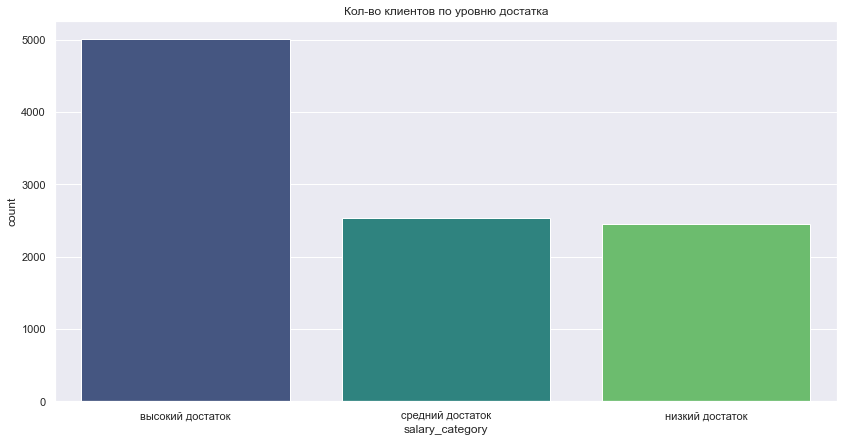

In [38]:
sns.countplot(x = 'salary_category', data = df, palette = 'viridis')
plt.title('Кол-во клиентов по уровню достатка')

В данной выборке половина клиентов имеет высокий достаток.

#### Категоризация по возрасту

In [39]:
#напишем функцию, которая распределяет возраст по категориям
def age_category(df):
    
    if df['age'] <= 30:
        return 'молодой'
    
    elif df['age'] <= 55:
        return 'среднего возраста'
    
    else:
        return 'пенсионного возраста'

#добавим новый столбец в таблицу
df['age_category'] = df.apply(age_category, axis=1)

df.head(3)

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account,salary_category,age_category
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,"101,348.88",1,0,высокий достаток,среднего возраста
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0,1,высокий достаток,среднего возраста
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1,1,высокий достаток,среднего возраста


In [40]:
df['age_category'].value_counts()

среднего возраста       7232
молодой                 1968
пенсионного возраста     800
Name: age_category, dtype: int64

Text(0.5, 1.0, 'Кол-во клиентов в возрастных категориях')

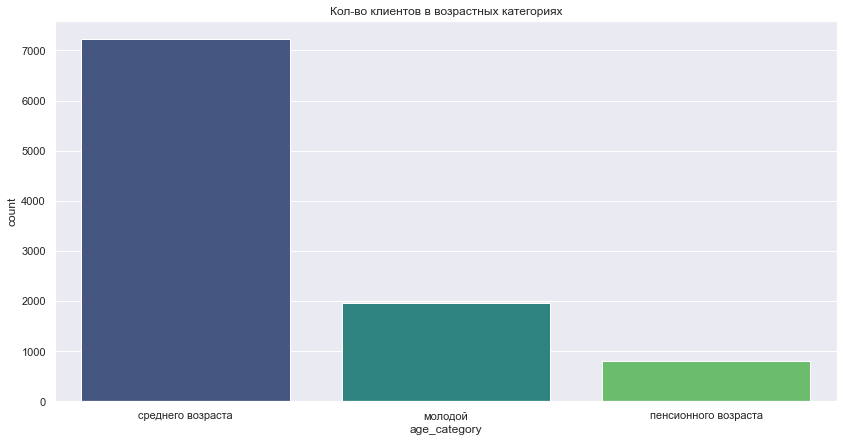

In [41]:
sns.countplot(x = 'age_category', data = df, palette = 'viridis')
plt.title('Кол-во клиентов в возрастных категориях')

В данной выборке около 70% клиентов среднего возраста, т.е. не студенты и не пенсионеры.

#### Категоризация по числу объектов в собственности

In [42]:
#напишем функцию по категоризации по числу объектов в собстенности
def objects_category(df):
    
    if df['objects'] == 0:
        return 'нет объектов'
    
    elif df['objects'] < 3:
        return '1-2 объекта'
    
    elif df['objects'] <= 5:
        return '3-5 объектов'
    
    else:
        return 'боле 5 объектов'

#добавим новый столбец в таблицу
df['objects_category'] = df.apply(objects_category, axis=1)

df.head(3)

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account,salary_category,age_category,objects_category
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,"101,348.88",1,0,высокий достаток,среднего возраста,1-2 объекта
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0,1,высокий достаток,среднего возраста,1-2 объекта
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1,1,высокий достаток,среднего возраста,боле 5 объектов


In [43]:
df['objects_category'].value_counts()

боле 5 объектов    4494
3-5 объектов       3010
1-2 объекта        2083
нет объектов        413
Name: objects_category, dtype: int64

Text(0.5, 1.0, 'Кол-во клиентов в категорях по числу объектов в собственности')

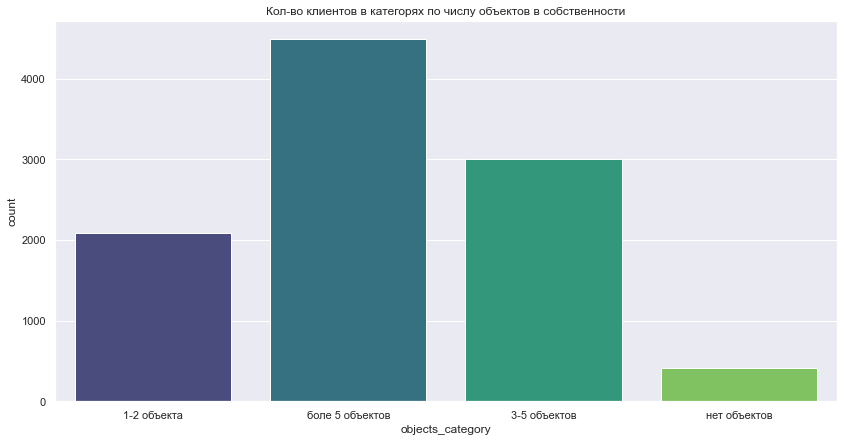

In [44]:
sns.countplot(x = 'objects_category', data = df, palette = 'viridis')
plt.title('Кол-во клиентов в категорях по числу объектов в собственности')

Довольно неожиданно, но у большинства клиентов в данной выборки в собственности более 5 объектов.

#### Категоризация по уровню кредитного скоринга

In [45]:
#напишем функцию, которая распределяет уровень score по категориям
def score_category(df):
    
    if df['score'] < 500:
        return 'низкий уровень'
    
    elif df['score'] <= 700:
        return 'средний уровень'
    
    else:
        return 'высокий уровень'

#добавим новый столбец в таблицу
df['score_category'] = df.apply(score_category, axis=1)

df.head(3)

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account,salary_category,age_category,objects_category,score_category
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,"101,348.88",1,0,высокий достаток,среднего возраста,1-2 объекта,средний уровень
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0,1,высокий достаток,среднего возраста,1-2 объекта,средний уровень
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1,1,высокий достаток,среднего возраста,боле 5 объектов,средний уровень


In [46]:
df['score_category'].value_counts()

средний уровень    6252
высокий уровень    3116
низкий уровень      632
Name: score_category, dtype: int64

Text(0.5, 1.0, 'Кол-во клиентов в категорях по банковскому скорингу')

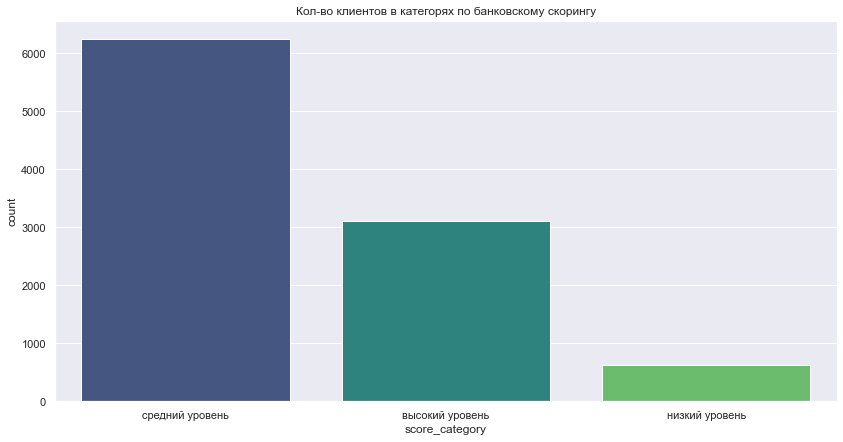

In [47]:
sns.countplot(x = 'score_category', data = df, palette = 'viridis')
plt.title('Кол-во клиентов в категорях по банковскому скорингу')

#### Категоризация по балансу счета клиента

In [48]:
#напишем функцию, которая распределяет баланс на счету по категориям
def balance_category(df):
    
    if df['balance'] <= 5000:
        return 'менее 5000р'
    
    elif df['balance'] <= 30000:
        return '5 000 - 30 000р'
    
    elif df['balance'] <= 50000:
        return '30 000 - 50 000р'
    
    elif df['balance'] <= 50000:
        return '50 000 - 100 000р'
    
    else:
        return 'более 100 000р'

#добавим новый столбец в таблицу
df['balance_category'] = df.apply(balance_category, axis=1)

df.head(3)

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account,salary_category,age_category,objects_category,score_category,balance_category
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,"101,348.88",1,0,высокий достаток,среднего возраста,1-2 объекта,средний уровень,менее 5000р
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0,1,высокий достаток,среднего возраста,1-2 объекта,средний уровень,более 100 000р
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1,1,высокий достаток,среднего возраста,боле 5 объектов,средний уровень,более 100 000р


Text(0.5, 1.0, 'Кол-во клиентов в категориях по уровню баланса счета')

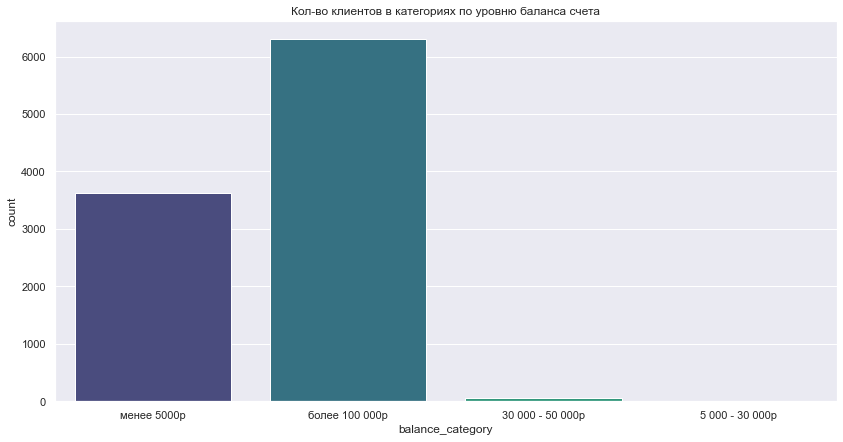

In [49]:
sns.countplot(x = 'balance_category', data = df, palette = 'viridis')
plt.title('Кол-во клиентов в категориях по уровню баланса счета')

In [50]:
df['balance_category'].value_counts()

более 100 000р      6308
менее 5000р         3618
30 000 - 50 000р      63
5 000 - 30 000р       11
Name: balance_category, dtype: int64

### Вывод  

Провели классификацию клиентов по уровню дохода, возрасту, числу объектов в собственности и кредитному скорингу. В данной выборке преобладают клиенты среднего возраста, с высоким достатком, средним уровнем кредитного скоринга, у которых во владении более 5 объектов и более 100 000р на балансе. 

<a id='3'><a/> 
## 3. Анализ данных (EDA)
[Назад к оглавлению](#back)

<a id='3.1'><a/> 
### 3.1 Анализ средних значений признаков и стандартного отклонения
[Назад к оглавлению](#back)

In [51]:
df_new = df.copy()

Заменим пол на единицы и нули, чтобы посмотреть статистику п полу.

In [52]:
df_new['gender'] = df_new['gender'].replace({'Ж':0, 'М': 1})

In [53]:
df_new.describe()

,user_id,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,0.55,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20,0.64
std,"71,936.19",96.65,0.50,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40,0.48
min,"15,608,437.00",350.00,0.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00,0.00
25%,"15,671,264.25",584.00,0.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00,0.00
50%,"15,733,474.00",652.00,1.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00,1.00
75%,"15,795,969.75",718.00,1.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00,1.00
max,"15,858,426.00",850.00,1.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00,1.00


• В данной выборке у нас все клиенты уникальные и их **10 000 чел**. 

• В среднем это стабильные клиенты, имеющие **результат кредитного скоринга равный в среднем 650 баллов**, что уже достаточно для получения кредита, хотя разброс тут достаточно большой. 

• Клиентам **от 18 до 92 лет**, что означает, что все совершеннолетние и **в среднем клиенту около 40 лет**.  

• Мужчин и женщин примерно поровну.  

• В среднем у клиентов **в собственности 5 объектов**.  

• На счету у них в среднем **около 80 000р**, если не брать в расчет клиентов, у которых отсутствует дебетовая карта, то **около 120 000р**.  

• В среднем клиенты пользуются **1-2 продуктами**, стандартное отклонение довольно большое, что говорит о большом разбросе.  

• Клиенты в среднем скорее **имеют кредитную карту**, чем нет, а вот по активности картина уже так себе, **активны всего около половины клиентов**.  

• Зарплаты так же у клиентов в данной выборке на неплохом уровне для региональных городов - **около 100 000р** и это не смотря на клиентов, с зп ниже официального минимума.  

• Более чем у половны клиентов есть действующий счет в банке. 

• В данной выборке **средний отток составляет 20%**.

<a id='3.2'><a/> 
### 3.2 Анализ средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался
[Назад к оглавлению](#back)

In [54]:
df_new.groupby('churn').agg('mean').T

churn,0,1
user_id,"15,733,903.88","15,732,787.96"
score,651.85,645.35
gender,0.57,0.44
age,37.41,44.84
objects,5.03,4.93
balance,"72,745.30","91,108.54"
products,1.54,1.48
creditcard,0.71,0.70
loyalty,0.55,0.36
estimated_salary,"99,738.39","101,465.68"


При первом взгляде на данные создается ощущение, что клиенты, ушедшие в отток почти ничем значительно не отличаются от лояльных клиентов, кроме активности (**в отток чаще попадают клиенты, не являющиеся активными**), так же можно сказать, что **в оттоке чуть больше женщин**. Есть небольшое отличие в балансе счета, в оттоке средняя зп выше. Остальные признаки отличаются не значительно.

<a id='3.3'><a/> 
### 3.3 Изучение распределений признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
[Назад к оглавлению](#back)

#### Построим countplot-графики для бинарных признаков.

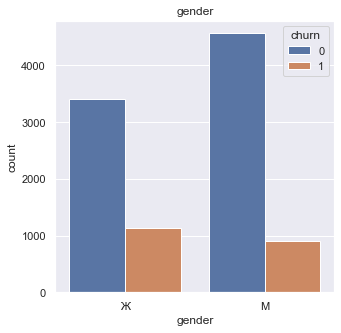

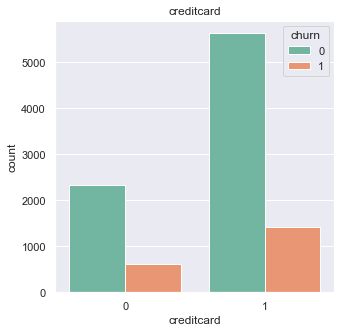

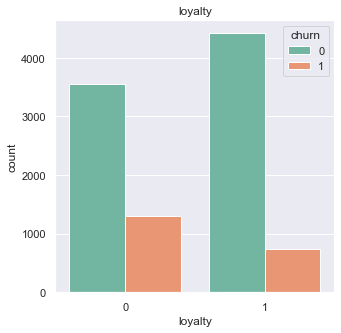

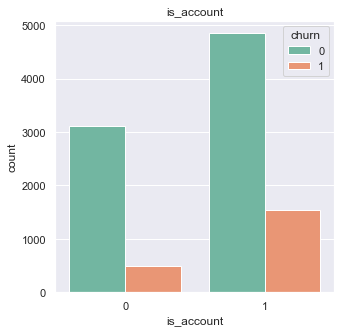

In [55]:
for column in ['gender', 'creditcard', 'loyalty', 'is_account']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    sns.set_palette('Set2')
    plt.title(column)
    plt.show()

В отток действительно уходит чуть больше женщин, чем мужчин, те, у кого есть кредитная карта, действующий счет в банке и в большинстве клиенты, которые являются неактивными.

#### Построим тепловые карты для небинарных признаков.

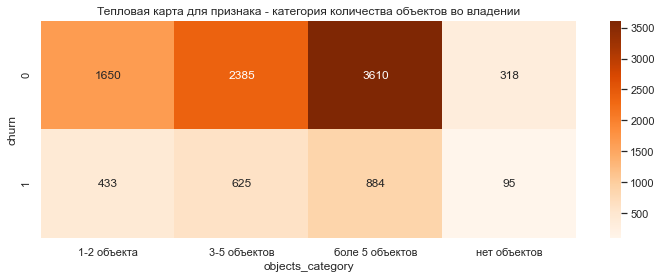

In [56]:
viz_data = df\
    .pivot_table(
        index='churn',
        columns='objects_category',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - категория количества объектов во владении')
plt.show()

По численности **в отток уходит больше клиентов имеющих в собственности более 5 объектов**, но это логично, потому что в данной выборке таких клиентов большинство. Однако, отточников тут всего **около 20%** (от общего числа в этой категории) как и в остальных случаях кроме отсутствия объектов в собственности, тут отточников **23%** (от общего числа в этой категории).

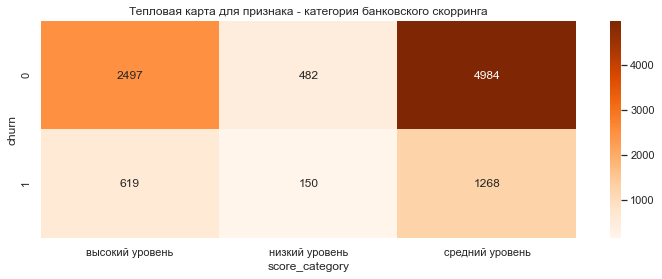

In [57]:
viz_data = df\
    .pivot_table(
        index='churn',
        columns='score_category',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - категория банковского скорринга')
plt.show()

Тут так же по численности **в оттоке большая часть клиентов со средним уровнем кредитного скоринга**, их так же большинство в выборке. По процентам в отток попадает **19%** (от общего числа в этой категории) с высоким уровнем, **20%** (от общего числа в этой категории) со средним уровнем и **23%** (от общего числа в этой категории) с низким уровнем.

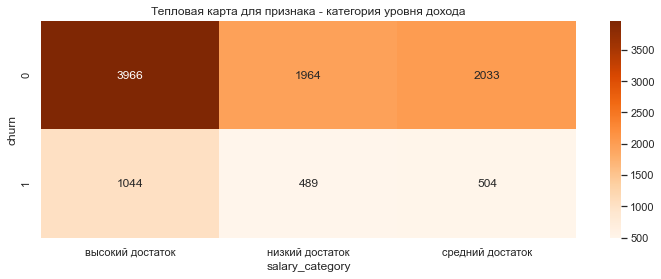

In [58]:
viz_data = df\
    .pivot_table(
        index='churn',
        columns='salary_category',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - категория уровня дохода')
plt.show()

По численности картина аналогична, **больше всего в отток попадает клиентов с высоким уровнем достатка**. По процентам в отток попадает **19%** (от общего числа в этой категории) со средним и низким уровнем дохода и **22%** (от общего числа в этой категории) с высоким уровнем дохода.

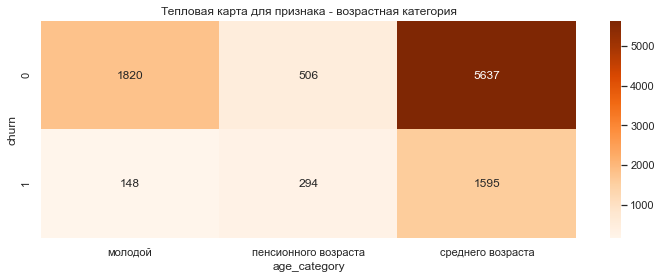

In [59]:
viz_data = df\
    .pivot_table(
        index='churn',
        columns='age_category',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - возрастная категория')
plt.show()

В отток уходит около **8%** (от общего числа в этой категории) молодых клиентов, около **22%** (от общего числа в этой категории) среднего возраста и **37%** (от общего числа в этой категории) пенсионного возраста. Но так как **в данной выборке большая часть клиентов среднего возраста, по численности они превосходят остальные категории**.

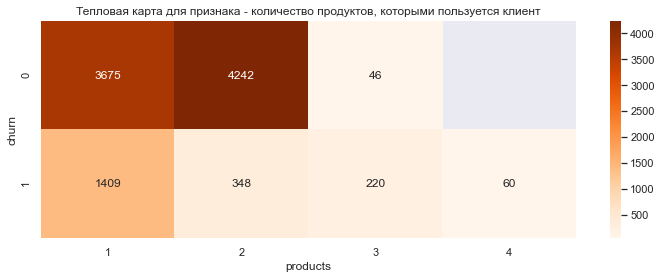

In [60]:
viz_data = df\
    .pivot_table(
        index='churn',
        columns='products',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - количество продуктов, которыми пользуется клиент')
plt.show()

**В отток уходит больше всего клиентов использующих 1 продукт**. Среди тех, кто пользуется **4 продуктами, похоже, все попадают в отток**. Проверим это.

In [61]:
df[df['products'] == 4]

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account,salary_category,age_category,objects_category,score_category,balance_category
7,15698884,376,Ростов Великий,Ж,29,4,"115,046.74",4,1,0,"119,346.88",1,1,высокий достаток,молодой,3-5 объектов,низкий уровень,более 100 000р
70,15746529,738,Ростов Великий,М,58,2,"133,745.44",4,1,0,"28,373.86",1,1,низкий достаток,пенсионного возраста,1-2 объекта,высокий уровень,более 100 000р
1254,15653119,628,Ярославль,Ж,46,1,"46,870.43",4,1,0,"31,272.14",1,1,низкий достаток,среднего возраста,1-2 объекта,средний уровень,30 000 - 50 000р
1469,15713110,819,Ростов Великий,Ж,49,1,"120,656.86",4,0,0,"166,164.30",1,1,высокий достаток,среднего возраста,1-2 объекта,высокий уровень,более 100 000р
1488,15668560,596,Рыбинск,М,30,6,"121,345.88",4,1,0,"41,921.75",1,1,низкий достаток,молодой,боле 5 объектов,средний уровень,более 100 000р
1701,15648015,792,Ярославль,М,50,9,0.00,4,1,1,"194,700.81",1,0,высокий достаток,среднего возраста,боле 5 объектов,высокий уровень,менее 5000р
1876,15707490,640,Ростов Великий,М,39,9,"131,607.28",4,0,1,"6,981.43",1,1,низкий достаток,среднего возраста,боле 5 объектов,средний уровень,более 100 000р
2124,15646587,704,Ярославль,М,32,7,"127,785.17",4,0,0,"184,464.70",1,1,высокий достаток,среднего возраста,боле 5 объектов,высокий уровень,более 100 000р
2196,15834436,773,Ростов Великий,М,47,2,"118,079.47",4,1,1,"143,007.49",1,1,высокий достаток,среднего возраста,1-2 объекта,высокий уровень,более 100 000р
2285,15826351,630,Ростов Великий,М,50,3,"129,370.91",4,1,1,"47,775.34",1,1,низкий достаток,среднего возраста,3-5 объектов,средний уровень,более 100 000р


Действительно, в данной выборке, те кто пользуются 4 продуктами банка - все попадают в отток. Использование 3 продуктов так же не популярно среди лояльных клиентов. Можно сделать предположение, что большое число продуктов это маркер, который указывает на то, что клиент скорее всего уйдет. Хотелось бы узнать информацию по продуктам, чтобы можно было сделать предположения и выводы на этот счет.

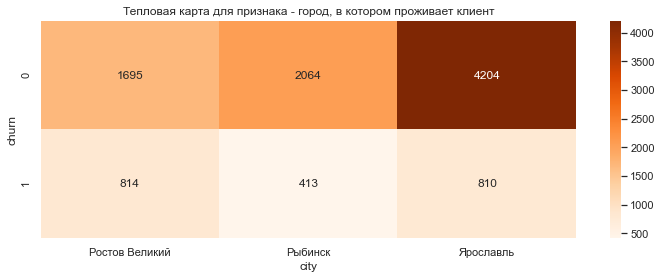

In [62]:
viz_data = df\
    .pivot_table(
        index='churn',
        columns='city',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - город, в котором проживает клиент')
plt.show()

In [63]:
df['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

Можно сказать, что большая часть клиентов в данной выборке, которые остаются **верными банку проживает в Ярославле** (но и половина клиентов проживает там). Что касается **отточников - Ростов Великий и Ярославль** идут "ноздря в ноздрю", а меньше всего в отток уходят жители Рыбинска (в данной выборке там проживает меньше всего клиентов).

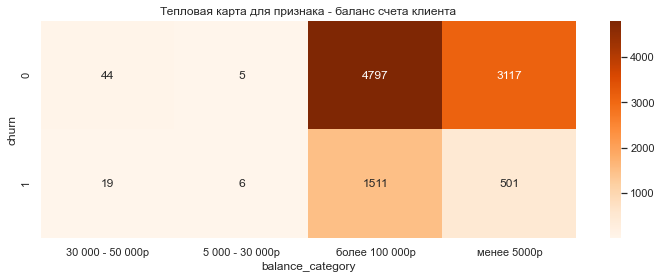

In [64]:
viz_data = df\
    .pivot_table(
        index='churn',
        columns='balance_category',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - баланс счета клиента')
plt.show()

В данной выборке по численности **больше всего в отток уходит клиентов с балансом счета более 100к, их около 20% (от общего числа в этой категории)**. Среди клиентов с балансом 30-50к уходит в отток около **30%** (от общего числа в этой категории), клиентов с балансом 5-30к по численности в отток уходит меньше всего, однако их **54%** (от общего числа в этой категории). Клиентов с балансом менее 5к уходит в отток **13%** (от общего числа в этой категории), а по общей численности они на 2 месте.

<a id='3.4'><a/> 
### 3.4 Изучение распределений признаков без привязки к признаку ухода в отток
[Назад к оглавлению](#back)

#### Построим диаграмму размаха по возрасту и полу клиентов.

Text(0.5, 1.0, 'Диаграмма размаха по возрасту и полу клиентов')

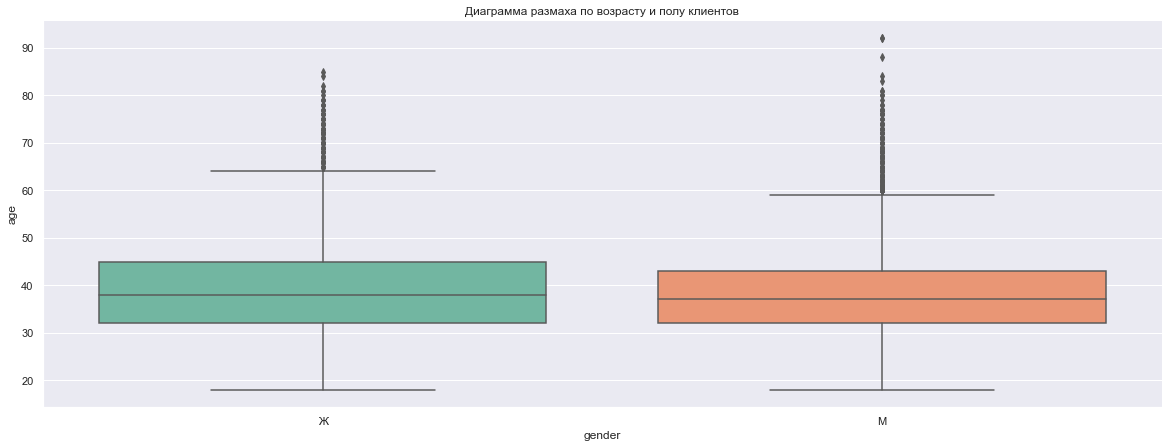

In [65]:
sns.catplot(x='gender', y="age", kind="box", data=df, height=6, aspect=2.7)
plt.title('Диаграмма размаха по возрасту и полу клиентов')
#sns.set(rc={'figure.figsize':(14,14)})
#_ = plt.ylim(0, 3)

По графику видно, что в данной выборке в общей массе в среднем мужчины немного моложе, женщин, но в то же время среди мужчин встречаются "выбросы" в виде очень пожилых клиентов (до 92 лет). 

#### Построим диаграмму размаха по полу и уровню дохода клиентов.

Text(0.5, 1.0, 'Диаграмма размаха по полу  и уровню дохода клиентов')

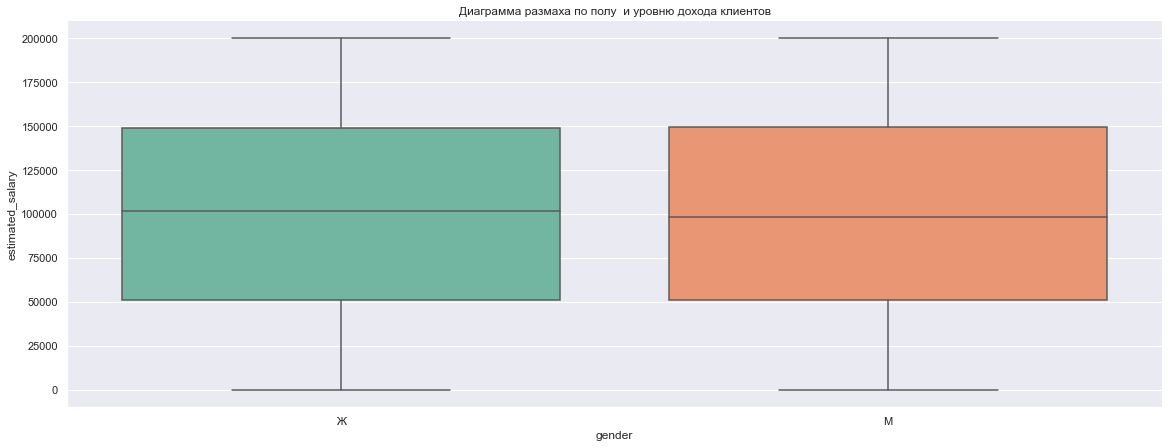

In [66]:
sns.catplot(x='gender', y="estimated_salary", kind="box", data=df, height=6, aspect=2.7)
plt.title('Диаграмма размаха по полу  и уровню дохода клиентов')

Явных различий по уровню дохода у клиентов мужского и женского пола не обнаружено.

#### Построим countplot-графики для бинарных признаков по активности клиентов

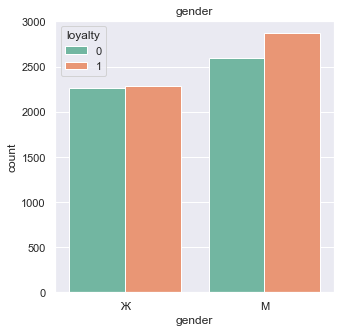

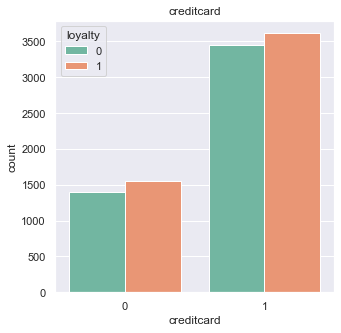

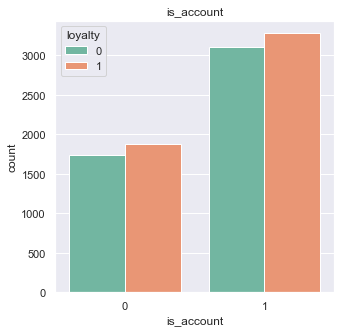

In [67]:
for column in ['gender', 'creditcard', 'is_account']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='loyalty', data=df)
    sns.set_palette('Set2')
    plt.title(column)
    plt.show()

• Можно сделать вывод, что **мужчины более активные клиенты банка**, чем женщины.  
• Так же **более активны клиенты имеющие кредитную карту** и действующий аккаунт в банке.

#### Построим kdeplot-графики для небинарных признаков по активности клиентов.

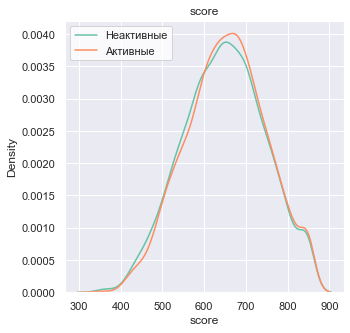

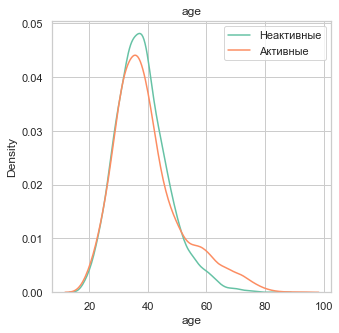

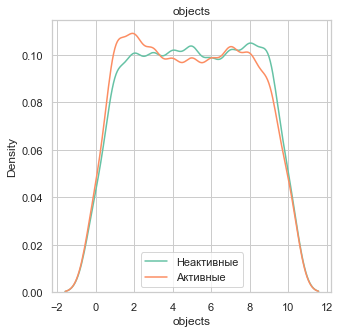

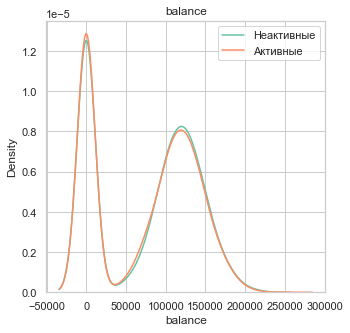

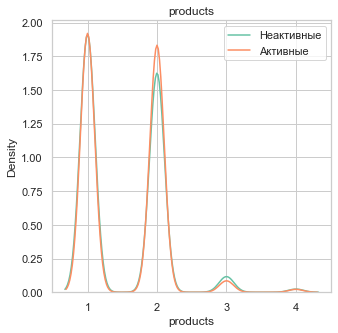

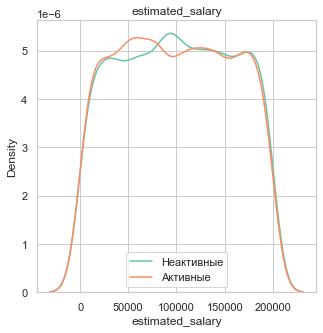

In [68]:
for column in ['score', 'age', 'objects', 'balance', 'products', 'estimated_salary']:
    plt.figure(figsize=(5, 5))
    plt.title(column)   
    sns.kdeplot(df.query('loyalty==0')[column], label = 'Неактивные')
    sns.kdeplot(df.query('loyalty==1')[column], label = 'Активные')
    
    sns.set_style('whitegrid')
    plt.legend()
    plt.show()

• Среди неактивных клиентов чаще встречаются клиенты среднего возраста около **40 лет**.  

• Клиенты имеющие **в собственности 8 и более объектов** чаще неактивны, в то время как клиенты, имеющие **в собственности 1-2 объекта** являются самыми активными.  

• Клиенты с заработной платой около **100 000 руб** чаще не активны, в то время как клиенты с заработной платой около **50 000 руб** наиболее активные.

#### Построим тепловые карты для небинарных признаков

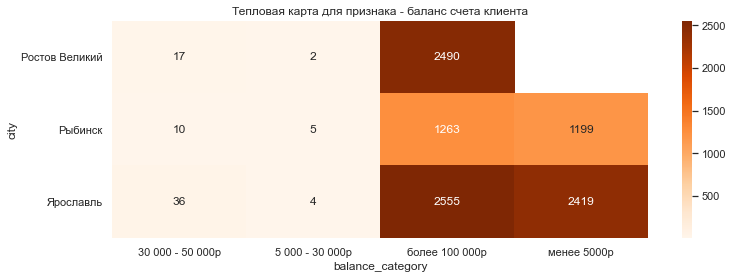

In [69]:
viz_data = df\
    .pivot_table(
        index='city',
        columns='balance_category',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - баланс счета клиента')
plt.show()

• В **Ростове Великом** нет клиентов, у которых баланс счета **менее 5000 руб**. Больше всего таких клиентов проживает в **Ярославле**.  

• В **Ярославле** проживет больше всего клиентов с балансом счета **более 1000 000 руб**.  

• У большей части клиентов на балансе **более 100 000 рублей**. Во всех городах клиентов, у которых на балансе **5-30к** и **30-50к** значительное меньшинство по сравнению с другими категориями. 

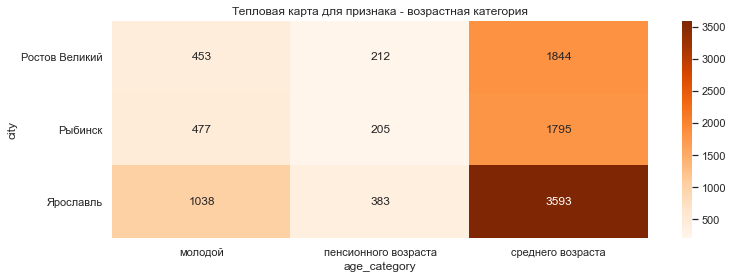

In [70]:
viz_data = df\
    .pivot_table(
        index='city',
        columns='age_category',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - возрастная категория')
plt.show()

• В **Ярославле** проживает больше всего по численности всех категорий клиентов: молодых, среднего возраста и пенсионного.  
• В **Рыбинске и Ростове Великом** преоблажают клиенты среднего возраста.

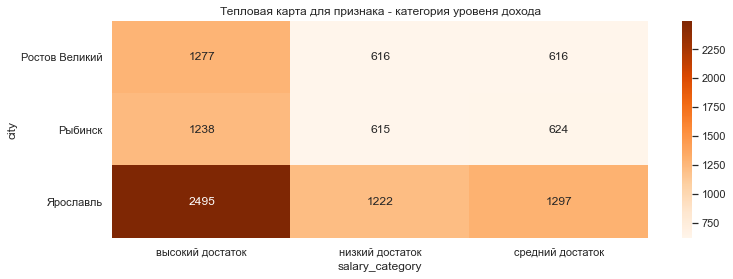

In [71]:
viz_data = df\
    .pivot_table(
        index='city',
        columns='salary_category',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - категория уровеня дохода')
plt.show()

• В **Ярославле** проживает больше всего по численности всех категорий клиентов: высокий, средний и низкий достаток.  
• В **Рыбинске и Ростове Великом** преобладают клиенты с высоким уровнем достатка.

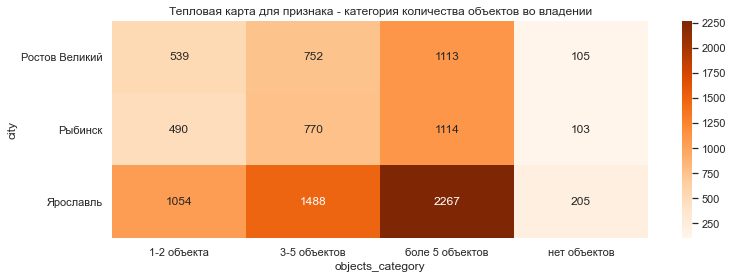

In [72]:
viz_data = df\
    .pivot_table(
        index='city',
        columns='objects_category',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - категория количества объектов во владении')
plt.show()

• В **Ярославле** проживает больше всего по численности всех категорий клиентов.   
• В **Рыбинске и Ростове Великом** преобладают клиенты с более чем 5 объектами в собственности.

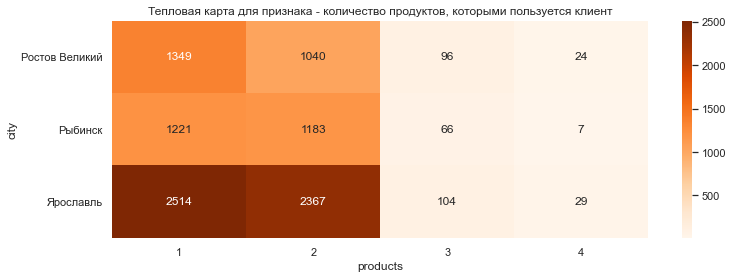

In [73]:
viz_data = df\
    .pivot_table(
        index='city',
        columns='products',
        values='user_id',
        aggfunc='count'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Тепловая карта для признака - количество продуктов, которыми пользуется клиент')
plt.show()

• Использование 3-4 продуктов не популярно среди клиентов банка и как мы помним - это сильный признак того, что клиенты уйдут или уже ушли в отток. Больше всего таких клиентов проживает в Ярославле, на следующем месте Ростов Великий.  

• Больше всего клиентов пользуются 1 продуктом. 

<a id='3.5'><a/> 
### 3.5 Корреляционный анализ
[Назад к оглавлению](#back)

In [74]:
df_new.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,is_account,salary_category,age_category,objects_category,score_category,balance_category
0,15677338,619,Ярославль,0,42,2,0.00,1,1,1,"101,348.88",1,0,высокий достаток,среднего возраста,1-2 объекта,средний уровень,менее 5000р
1,15690047,608,Рыбинск,0,41,1,"83,807.86",1,0,1,"112,542.58",0,1,высокий достаток,среднего возраста,1-2 объекта,средний уровень,более 100 000р
2,15662040,502,Ярославль,0,42,8,"159,660.80",3,1,0,"113,931.57",1,1,высокий достаток,среднего возраста,боле 5 объектов,средний уровень,более 100 000р
3,15744090,699,Ярославль,0,39,1,0.00,2,0,0,"93,826.63",0,0,средний достаток,среднего возраста,1-2 объекта,средний уровень,менее 5000р
4,15780624,850,Рыбинск,0,43,2,"125,510.82",1,1,1,"79,084.10",0,1,средний достаток,среднего возраста,1-2 объекта,высокий уровень,более 100 000р


In [75]:
df_new = df_new[['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary',
       'is_account', 'churn', 'salary_category', 'age_category', 'objects_category',
       'score_category', 'balance_category']]

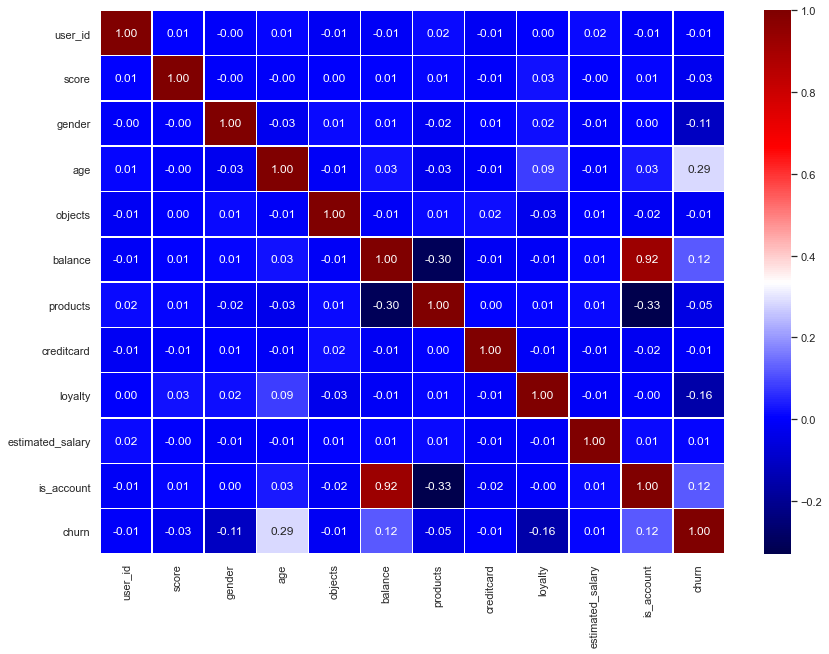

In [76]:
corr_matrix = df_new.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix , annot = True, fmt = '0.2f', linewidths=.5, cmap="seismic")
plt.show()

• По матрице корреляций можно сказать, что влияние на отток имеют такие признаки как **возраст (слабая корреляция)**, **активность (очень слабая корреляция)** и **пол (очень слабая корреляция)**. Так же влияние имеют **баланс** и **наличие действующего счета в банке (оба признака так же очень слабая корреляция)**.  

• Мультиколлинеарные признаки в данном случае это баланс и наличие действующего счета в банке. Это ожидаемо, потому что мы обозначили счета с нулевым балансом как отсутствие действующего счета. 

• Признаков имеющих нулевую корреляцию с целевой переменной нет, но большая часть почти нулевая (очень слабая, равная 0.01).  

• Такие признаки как заработная плата, наличие кредитной карты, количество объектов в собственности имеют корреляцию всего 0.01 (или -0.01), что говорит о том, что они почти никак не влияют.  

• Так же мы видим, что **баланс счета довольно сильно коррелирует с количеством продуктов, которыми пользуется клиент**. 

  
**В целом можно сказать, что мы имеем довольно слабые признаки.** Нет ни одного признака, который коррелировал бы с целевой переменной выше уровня слабой корреляции, в данном случае это не больше 0.29. Следовательно, у нас нет какого-то очевидного признака, по которому мы могли бы явно выявить  склонность клиентов к оттоку.

In [77]:
age = df.groupby('age')['churn'].count().reset_index()
age.sort_values(by='churn', ascending=False)

,age,churn
19,37,478
20,38,477
17,35,474
18,36,456
16,34,447
...,...,...
69,92,2
64,82,1
65,83,1
67,85,1


**В отток чаще всего уходят клиенты "медианного" возраста.** Но как мы уже видели ранее, таких клиентов больше всего в данной выборке.

In [78]:
medians = df_new.pivot_table(index='churn', values=['age', 'gender', 'products', 'loyalty', 'balance', 'is_account'], aggfunc='median')
medians

,age,balance,gender,is_account,loyalty,products
churn,,,,,,
0,36,"92,072.68",1,1,1,2
1,45,"109,349.29",0,1,0,1


Глядя на медианные значения, можно сделать вывод:  

• "в среднем по больнице" **в отток** уходят скорее **женщины среднего возраста, пользующиеся одним продуктом и являющимися неактивными клиентами банка**.  

• **лояльными клиентами** являются в большинстве **мужчины среднего возраста, пользующиеся 2 и боле продуктами**.  

• наличие действующего счета в банке не отличается в оттоке и не оттоке

<a id='4'><a/> 
## 4. Выведение портрета клиентов, которые склонны и не склонны уходить из банка на основе EDA
[Назад к оглавлению](#back)

По итогам проведения анализа предварительно можно выделить такие признаки клиентов.  

### Признаки клиентов, которые склонны уходить в отток:  

- клиенты проживают в Ярославле или Ростове Великом
- в отток чаще попадают женщины
- клиенты среднего возраста (около 35-40 лет). Так же стоит обратить внимание на клиентов пенсионного возраста, их всего 8% от общего числа клиентов в данной выборке, но в этой категории самый высокий процент оттока - 37% (от общего числа в этой категории).  
- клиенты имеют более 5 объектов в собственности, таких клиентов больше всего в данной выборке. Стоит обратить внимание на клиентов не имеющих объектов в собственности, тут отточников 23% (от общего числа в этой категории).
- клиенты со средним уровнем кредитного скоринга (менее 500 баллов), таких клиентов большинство в выборке. Стоит обратить внимание на клиентов с низким уровнем скоринга, среди них в отток уходит 23% (от общего числа в этой категории).
- неактивные клиенты 
- у клиента есть кредитная карта
- клиенты с высоким уровнем дохода (более 100к).
- клиенты пользующиеся 3-4 продуктами (в случае 4 продуктов это 100%-ый отток).  

### Признаки клиентов, которые не склонны уходить в отток:  

- клиенты проживающие в Рыбинске  
- в большей массе это мужчины  
- клиенты среднего возраста, их большинство в выборке. По категориям самые стабильные молодые клиенты (до 30 лет), их 92% лояльных.  
- имеют более 5 объектов, внутри этой категории так же процент лояльности самый большой - 80%
- клиенты со средним уровнем кредитного скоринга, их большая чсть в выборке, однако по категориям самой лояльной категорией являются клиенты с высоким уровнем скора - 80% не в оттоке.  
- активные клиенты
- с высоким достатком, однако внутри категорий более лояльными являются категории с низким и средним достатком, у них не в оттоке 80% клиентов внутри категорий.  
- клиенты использующие 1-2 продукта.

<a id='5'><a/> 
## 5. Проверка гипотез
[Назад к оглавлению](#back)

<a id='5.1'><a/> 
### 5.1 Гипотеза о различии дохода между теми клиентами, которые ушли и теми, которые остались
[Назад к оглавлению](#back)

Посмотрим на распределение уровня дохода клиентов и построим точечный график.

C:\Users\datur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение уровня дохода клиентов')

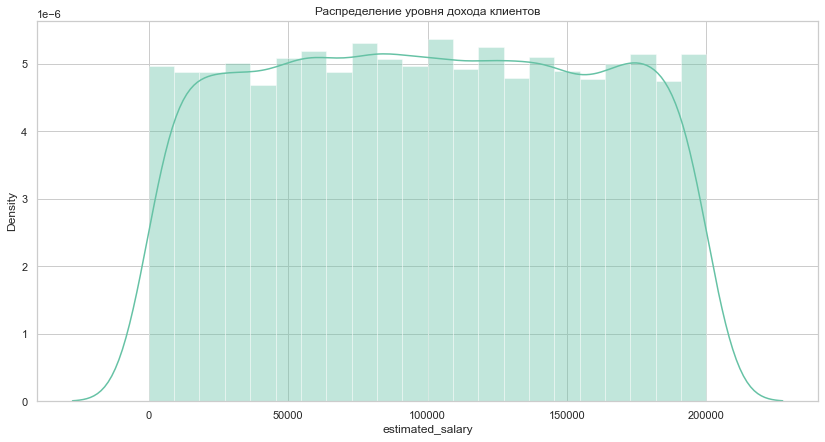

In [79]:
sns_plot = sns.distplot(df['estimated_salary'])
fig = sns_plot.get_figure()
plt.title('Распределение уровня дохода клиентов')

По графику рспределения можно скачать, что распределение не идеальное, но приближенное к нормальному.

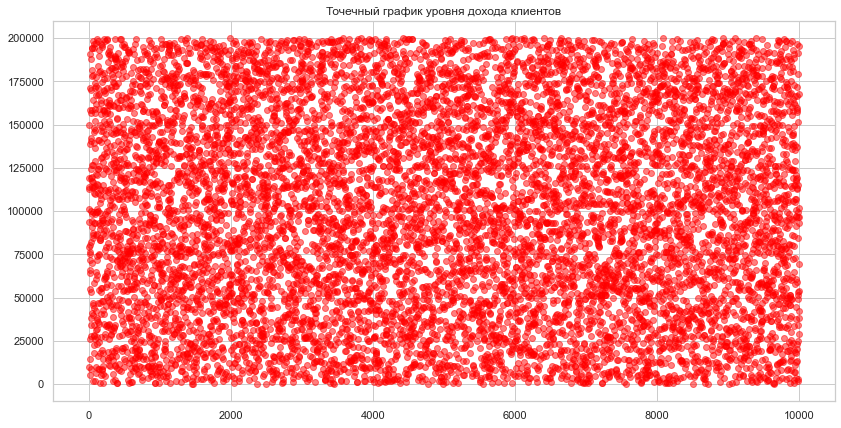

In [80]:
x_values = pd.Series(range(0,len(df['estimated_salary'])))
plt.scatter(x_values, df['estimated_salary'], color='red', alpha=0.5)
plt.title('Точечный график уровня дохода клиентов')
plt.show()

Тут так же на наблюдается выбросов в данных. Следовательно, при проверке гипотез мы можем использовать t-тест(распределение Стьюдента) или **U-критерий (Манна-Уитни)**. U критерий - наиболее мощная (чувствительная) непараметрическая альтернатива t-критерия для независимых выборок, в некоторых случаях он имеет даже большую мощность, чем t-критерий, поэтому будем использовать его.

Сформулируем гипотезы:    

<b>H0</b>: доход клиентов, которые ушли не превосходит доход, которые остались   
<b>H1</b>: доход клиентов, которые ушли превосходит доход, которые остались

In [81]:
alpha = 0.05

results = st.mannwhitneyu(df[df['churn']==1]['estimated_salary'], df[df['churn']==0]['estimated_salary'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.11352575465076892
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [82]:
print('Среднее значение дохода у тех, кто ушел в отток:', df[df['churn']==1]['estimated_salary'].mean())
print('Среднее значение дохода у тех, кто не ушел в отток:', df[df['churn']==0]['estimated_salary'].mean())

Среднее значение дохода у тех, кто ушел в отток: 101465.6775306824
Среднее значение дохода у тех, кто не ушел в отток: 99738.39177194514


In [83]:
print('Медианное значение дохода у тех, кто ушел в отток:', df[df['churn']==1]['estimated_salary'].median())
print('Медианное значение дохода у тех, кто не ушел в отток:', df[df['churn']==0]['estimated_salary'].median())

Медианное значение дохода у тех, кто ушел в отток: 102460.84
Медианное значение дохода у тех, кто не ушел в отток: 99645.04


#### Вывод  

Доход клиентов, которые ушли в отток немного превосходит доход клиентв, которые остались. Но в данном случае мы не можем говорить о статистически-значимой разнице.

<a id='5.2'><a/> 
### 5.2 Гипотеза о различии возраста между теми клиентами, которые ушли и теми, которые остались
[Назад к оглавлению](#back)

Посмотрим на распределение возраста клиентов и посроим точечный график распределения.

C:\Users\datur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение возраста клиентов')

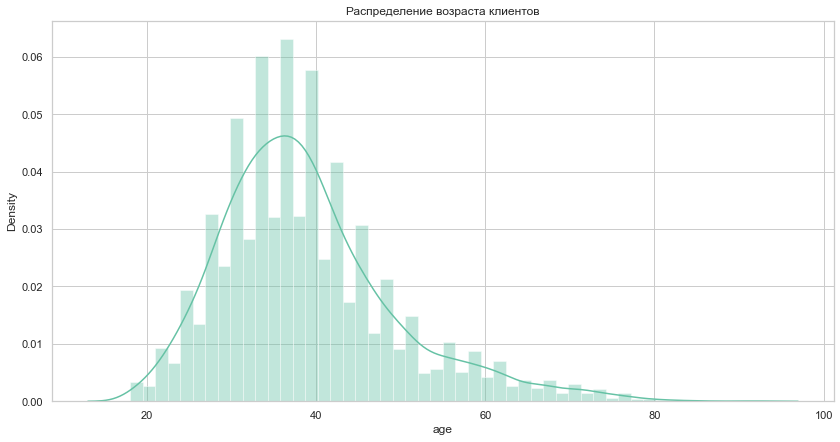

In [84]:
sns_plot = sns.distplot(df['age'])
fig = sns_plot.get_figure()
plt.title('Распределение возраста клиентов')

В данном случае распределение больше приближено к нормальному, хоть и есть небольшой перекос в виде нескольких клиентов довольно преклонного возраста.

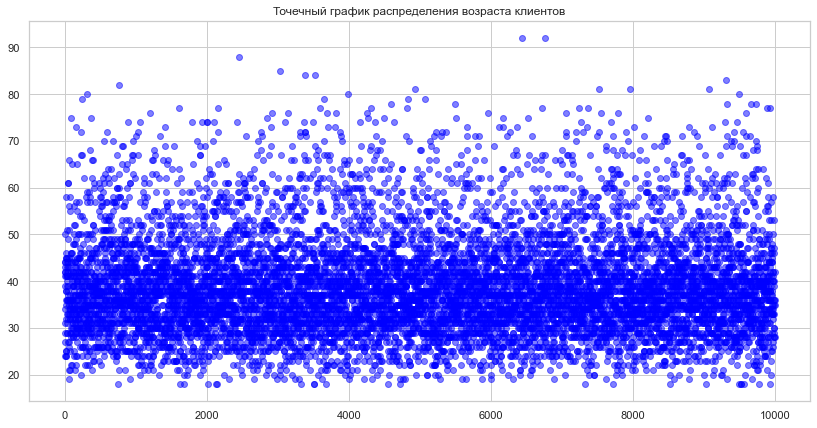

In [85]:
x_values = pd.Series(range(0,len(df['age'])))
plt.scatter(x_values, df['age'], color='blue', alpha=0.5)
plt.title('Точечный график распределения возраста клиентов')
plt.show()

Распределение несовсем равномерное и имеются клиенты довольно приклонного возраста. В данном случае так же воспользуемся кретерием Манна-Уитни.

Сформулируем гипотезы:    

<b>H0</b>: Возраст клиентов ушедших в отток и оставшихся не различается  
<b>H1</b>: Возраст клиентов ушедших в отток и оставшихся различается

In [86]:
alpha = 0.05

results = st.mannwhitneyu(df[df['churn']==1]['age'], df[df['churn']==0]['age'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  1.6052007159685838e-230
Отвергаем H0: разница статистически значима


Посмотрим на медианный возраст клиентов.

In [87]:
df.pivot_table(index='churn', values='age', aggfunc='median')

,age
churn,
0,36
1,45


Посмотрим на средний возраст.

In [88]:
df.pivot_table(index='churn', values='age', aggfunc='mean')

,age
churn,
0,37.41
1,44.84


#### Вывод  

Не удалось отвергнуть нулевую гипотезу об отсутствии различий в возрасте тех, кто ушел в отток и кто не ушел. И как мы видим, действительно разница в возрасте составляет около 10 лет. 

<a id='6'><a/> 
## 6. Прогнозирование оттока клиентов
[Назад к оглавлению](#back)

<a id='6.1'><a/> 
### 6.1 Построение модели прогнозирования оттока клиентов
[Назад к оглавлению](#back)

In [89]:
df_new.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,is_account,churn,salary_category,age_category,objects_category,score_category,balance_category
0,15677338,619,Ярославль,0,42,2,0.00,1,1,1,"101,348.88",0,1,высокий достаток,среднего возраста,1-2 объекта,средний уровень,менее 5000р
1,15690047,608,Рыбинск,0,41,1,"83,807.86",1,0,1,"112,542.58",1,0,высокий достаток,среднего возраста,1-2 объекта,средний уровень,более 100 000р
2,15662040,502,Ярославль,0,42,8,"159,660.80",3,1,0,"113,931.57",1,1,высокий достаток,среднего возраста,боле 5 объектов,средний уровень,более 100 000р
3,15744090,699,Ярославль,0,39,1,0.00,2,0,0,"93,826.63",0,0,средний достаток,среднего возраста,1-2 объекта,средний уровень,менее 5000р
4,15780624,850,Рыбинск,0,43,2,"125,510.82",1,1,1,"79,084.10",1,0,средний достаток,среднего возраста,1-2 объекта,высокий уровень,более 100 000р


Избавимся от столбцов с категориями, которые мы добавили ранее для удобства анализа.

In [90]:
df_new.drop('score_category', axis=1, inplace=True)
df_new.drop('salary_category', axis=1, inplace=True)
df_new.drop('age_category', axis=1, inplace=True)
df_new.drop('objects_category', axis=1, inplace=True)
df_new.drop('balance_category', axis=1, inplace=True)

Так как у нас есть два мультиколлинеарных признака - баланс и наличие действующего счета в банке, то необходимо или удалить один или попробовать создать новый признак из них. В данном случае логично будет удалить наличие действующего счета, так как мы ранее обнаружили, что он не влияет на отток.

In [91]:
df_new.drop('is_account', axis=1, inplace=True)

Посмотрим еще раз корреляционную матрицу.

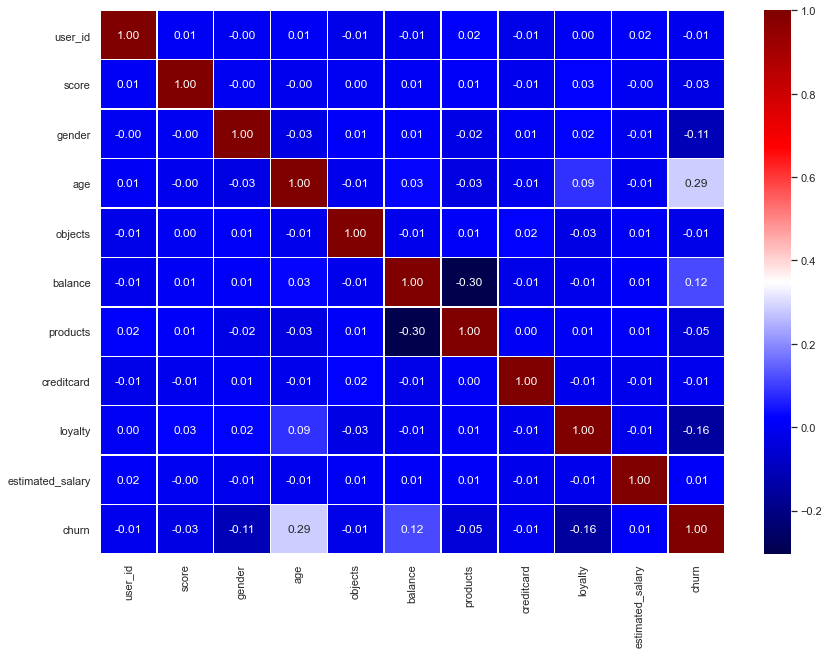

In [92]:
corr_matrix = df_new.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix , annot = True, fmt = '0.2f', linewidths=.5, cmap="seismic")
plt.show()

### В качестве модели для прогнозирования оттока выбрем CatBoost

In [94]:
from catboost import CatBoostClassifier

Разобьем данные на обучающую и валидационную выборки.  

• Это необходимо для того, чтобы мы смогли на части данных обучить модель, а на другой ее части проверить, на сколько хорошо она научилась предсказывать отток. Если этого не сделать, то модель переобучится и даст отличные результаты на известных ей данных, а на новых потерпит полный провал. Поэтому мы отведем **70% выборки под обучающую** часть и **30% на валидационную**.  

• Если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины будут иметь одни и те же значения при каждом вызове. Зададим 42, потому что это ответ на вопрос жизни, вселенной и всего такого. :)  

• Тренировочную и валидационную выборку разобьем стратифицированно, чтобы распределения в выборках были идентичными.

In [95]:
train, test = train_test_split(df_new, test_size=0.3, random_state=42, stratify=df_new['churn'])

In [96]:
X_col = ['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary']
y_col = ['churn']

cat_features = ['city']

В качестве метрики качества выберем **AUC**, так как она устойчива к несбалансированным классам и чаще всего дает хорошие результаты. 

In [97]:
model = CatBoostClassifier(learning_rate=0.005,
                           eval_metric='AUC', 
                           verbose=50,
                           cat_features=cat_features)


model.fit(train[X_col],train[y_col],
          eval_set=(test[X_col],test[y_col]), verbose=50)

0:	test: 0.8347291	best: 0.8347291 (0)	total: 250ms	remaining: 4m 9s
50:	test: 0.8669101	best: 0.8674370 (47)	total: 1.61s	remaining: 30.1s
100:	test: 0.8701139	best: 0.8704229 (97)	total: 3.35s	remaining: 29.8s
150:	test: 0.8723452	best: 0.8723658 (148)	total: 5.4s	remaining: 30.4s
200:	test: 0.8741573	best: 0.8741573 (200)	total: 6.98s	remaining: 27.8s
250:	test: 0.8763146	best: 0.8763317 (242)	total: 8.48s	remaining: 25.3s
300:	test: 0.8780109	best: 0.8780109 (300)	total: 10.6s	remaining: 24.5s
350:	test: 0.8793913	best: 0.8793913 (350)	total: 12.3s	remaining: 22.8s
400:	test: 0.8807669	best: 0.8807820 (399)	total: 14.2s	remaining: 21.2s
450:	test: 0.8821056	best: 0.8821056 (450)	total: 16.4s	remaining: 20s
500:	test: 0.8829928	best: 0.8829928 (500)	total: 18.3s	remaining: 18.2s
550:	test: 0.8836799	best: 0.8837073 (548)	total: 20.7s	remaining: 16.8s
600:	test: 0.8840533	best: 0.8840615 (599)	total: 23s	remaining: 15.3s
650:	test: 0.8846698	best: 0.8846698 (650)	total: 24.6s	remaini

### Вывод  

Мы получили точность модели равную 0.8863709076, это значит, что в дальнейшем данная модель сможет с точностью 88% предсказывать, помогать выявлять клиентов, которые могут оказаться склонными к тому, чтобы уйти в отток. Это даст возможность определять, кому конкретно из клиентов можно предложить специальные предложения.  

Другие модели, например, "Логистическая регрессия" и "Случайный лес" так же могут давать хорошие результаты, особенно при тщательной подготовке данных и хорошо подобранных параметрах. Плюсы модели CatBoost в том, что она дает отличные результаты при минимальном участии человека, если так можно выразиться :) Но онечно же не является панацеей.

<a id='6.1.1'><a/> 
### 6.1.1 Анализ приоритезации признаков модели
[Назад к оглавлению](#back)

Изучим, какие признаки модель посчитала самыми важными при обучении и сравним результаты с проведенным ранее анализом. 

In [98]:
model.predict_proba(test[X_col])

array([[0.97844159, 0.02155841],
       [0.90345677, 0.09654323],
       [0.8979829 , 0.1020171 ],
       ...,
       [0.58138547, 0.41861453],
       [0.65852195, 0.34147805],
       [0.97474283, 0.02525717]])

Переведем результаты в датафрейм.

In [99]:
fich = pd.DataFrame({'feature':X_col,'fich':model.feature_importances_})

In [100]:
fich.sort_values('fich',ascending=False)

,feature,fich
7,products,33.81
4,age,24.38
6,balance,11.39
2,city,10.39
9,loyalty,8.44
3,gender,3.20
10,estimated_salary,2.36
1,score,2.31
0,user_id,2.02
5,objects,1.36


Как видно поданным, в топ-3 входят такие признаки как: количество продуктов, которыми пользуется клиент, возраст и баланс счета. Только потом идет город. В случае, если выставить learning_rate = 0.03, то тройка выглядит так: возраст, количество продуктов, баланс. Суть остается та же. 

Воспользуемся **библиотекой SHAP**, чтобы посмотреть на графиках, как выглядит преоритезация фичей. Иинтерпретируемость ML-модели повышает ее потенциальную ценность. Мы как люди можем убедиться, что в результатах есть логика, а так же проверить свои ранее сделанные предположения. Так же можно в процессе найти интересные инсайты в данных. 

In [102]:
#pip install shap
#pip install xgboost

import xgboost
import shap

In [98]:
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train[X_col])

shap.force_plot(explainer.expected_value, shap_values[0,:], train[X_col].iloc[0,:])

<img src="https://sun9-56.userapi.com/impg/zLSxGo4tzk1DkJhT_ZQkXgd7pf32ArH-1MNVww/NkTZ9etrJ6o.jpg?size=1371x248&quality=96&sign=304a2e328bffff7f9cf3912e495fffa6&type=album">
    
</div>

Это степень влияния разных предикторов на целевую переменную для конкретного случая. Красным цветом выделены признаки, которые увеличивают целевую переменную, а синим – те, что ее уменьшают. Можно вывести отсюда, что отток наиболее характерен для: жителей Ростова Великого, неактивных клиентов. И в то же время для тех, кто не уходит в отток самые сильные признаки это: использование 2 продуктов, мужской пол и возрост 32 года. 

In [99]:
shap.summary_plot(shap_values, train[X_col])

<img src="https://sun9-60.userapi.com/impg/znIOrypuYOadrvMmzcsGbwXIJQMIbyLxTycr-Q/uX0PpmhIqvg.jpg?size=556x375&quality=96&sign=fdcc3cc909bef749a9adef9653ca27e9&type=album">
    
</div>

График интерпретируется следующим образом:  

- каждый клиент обозначен в виде точки
- синим цветом отмечены клиенты с низким значением соответствующей переменной, а красным — с высоким
- горизонтальная ось показывает влияние каждой переменной на предсказанную вероятность дефолта для отдельного клиента  

Такая диаграмма позволяет быстро оценить, насколько результаты моделирования соответствует ожиданиям или здравому смыслу. Как видно по графику, наибольшие шансы, что клиент уйдет в отток если: чем старше клиент, чем менее он активный, чем выше у него баланс, если это женщина, чем выше его зарплата, чем меньше бансковский скор,если он проживает в Ростове Великом** и самое интересное - хорошо видно аномалию, что при использовании 4 продуктов клиент уходит в отток, так же как и при 3 продуктах. 

In [100]:
shap.summary_plot(shap_values, train[X_col], plot_type="bar")

<img src="https://sun9-40.userapi.com/impg/KIeeKrEqG35NoLY5opxZadp7D8MCZaurGnFeVw/jLmi--bsbAo.jpg?size=569x371&quality=96&sign=8a4d5cad1cf824251485117f3fccfb0d&type=album">
    
</div>

Тут так же наглядно видно, какие признаки наиболее сильно влияяют на отток.

### Вывод  

По итогам интерпретации полученной ML-модели по прогнозированию оттока можно сказаь, что результаты сходятся с полученными в EDA и это говорит о том, что данная модель будет достаточно хорошо прогнозировать отток, тут логика выглядит вполне адектватно. 

<a id='6.2'><a/> 
### 6.2 Кластеризация клиентов
[Назад к оглавлению](#back)

**Кластерный анализ** это многомерная статистическая процедура, выполняющая сбор данных, содержащих информацию о выборке объектов, и затем упорядочивающая объекты в сравнительно однородные группы. Мы применим его для того, чтобы получить более глубокое понимание клиентских сегментов.  

Сначала стандартизируем данные, затем построим матрицу расстояний, на стандартизованной матрице признаков, получим дендограмму, которая отобразит оптимальное число кластеров в выборке. Потом обучим модель кластеризации на основании алгоритма K-Means и изучим данные по кластерм.

Переведем названия городов в числовые значения, чтобы можно было обучить модель.

- Ярославль - 0  
- Рыбинск - 1
- Ростов Великий - 2

In [99]:
df['city'] = df['city'].replace({'Ярославль':0, 'Рыбинск': 1, 'Ростов Великий': 2})
df['gender'] = df['gender'].replace({'Ж':0, 'М': 1})

df.drop('score_category', axis=1, inplace=True)
df.drop('salary_category', axis=1, inplace=True)
df.drop('age_category', axis=1, inplace=True)
df.drop('objects_category', axis=1, inplace=True)
df.drop('balance_category', axis=1, inplace=True)
df.drop('is_account', axis=1, inplace=True)

In [100]:
df_cl = df.drop(['churn'], axis=1)
df_columns_list = df_cl.columns
df_cl.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary
0,15677338,619,0,0,42,2,0.00,1,1,1,"101,348.88"
1,15690047,608,1,0,41,1,"83,807.86",1,0,1,"112,542.58"
2,15662040,502,0,0,42,8,"159,660.80",3,1,0,"113,931.57"
3,15744090,699,0,0,39,1,0.00,2,0,0,"93,826.63"
4,15780624,850,1,0,43,2,"125,510.82",1,1,1,"79,084.10"


In [101]:
df_cl = StandardScaler().fit_transform(df_cl)
df_cl = pd.DataFrame(df_cl, columns = df_columns_list).astype('float64')

In [102]:
linked = linkage(df_cl, method = 'ward')

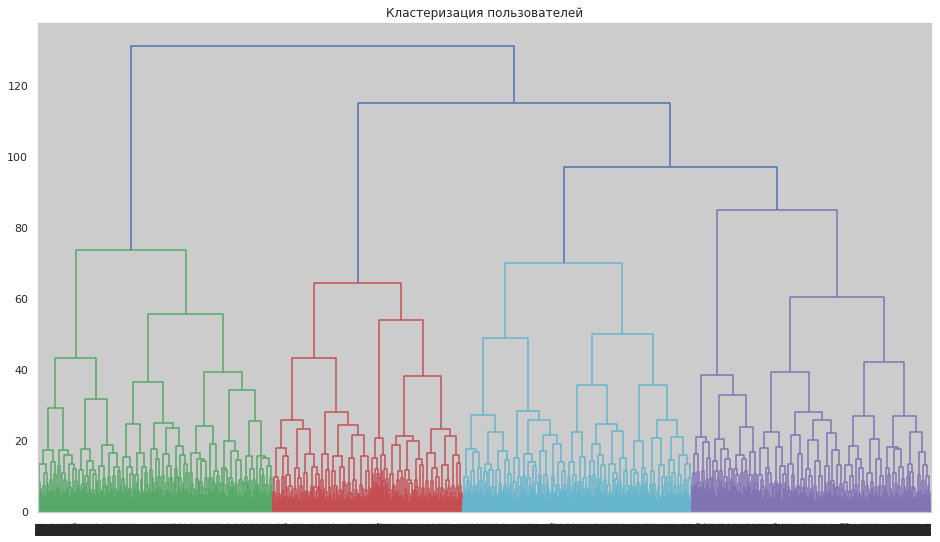

In [103]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Можно выделить 4 явных кластера клиентов.

In [104]:
km = KMeans(n_clusters = 4, random_state = 42)
labels = km.fit_predict(df_cl)
df['cluster'] = labels

Посмотрим на численность кластеров.

In [105]:
df.cluster.value_counts()

2    2940
1    2765
3    2285
0    2010
Name: cluster, dtype: int64

Выведем статистику по средним значениям наших признаков по кластеру.

In [106]:
df.groupby('cluster').mean().T

cluster,0,1,2,3
user_id,"15,731,820.01","15,735,543.16","15,735,176.40","15,731,121.24"
score,649.48,649.92,651.39,651.09
city,1.89,0.32,0.75,0.27
gender,0.53,0.54,0.54,0.57
age,39.52,38.57,39.11,38.58
objects,5.06,5.10,4.91,4.99
balance,"120,899.24","5,088.15","78,053.31","121,796.92"
products,1.59,1.82,1.52,1.14
creditcard,1.00,1.00,0.00,1.00
loyalty,0.49,0.52,0.52,0.53


• **Самым многочисленным кластером является 2-ой**, он на 3 месте по оттоку - **21%**.  
• **Наименьший отток в кластере 1**, он второй по численности. Следовательно, можно считать его самым стабильным и доходным.   
• **Наибольший отток в кластере 0 - 31%** и он самый малочисленный. 

#### Построим countplot-графики для бинарных признаков

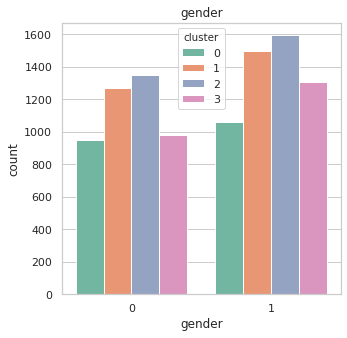

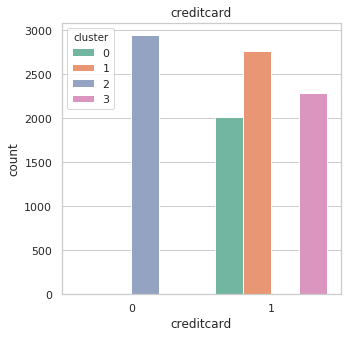

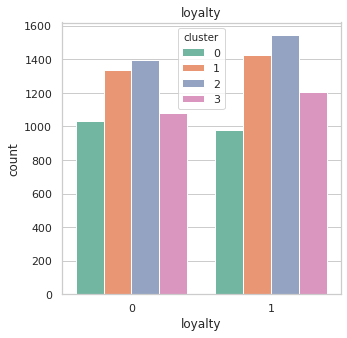

In [107]:
for column in ['gender', 'creditcard', 'loyalty']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

Интересно, что самый многочисленный кластер номер 2 и в него попали только те клиенты, у которых нет кредитной карты, те кто имеют кредитную карту, распределились по оставшимся кластерам. 

#### Построим kdeplot-графики для небинарных признаков

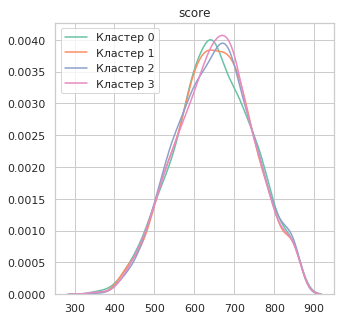

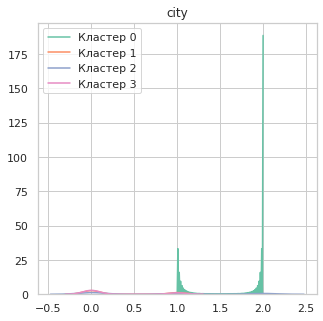

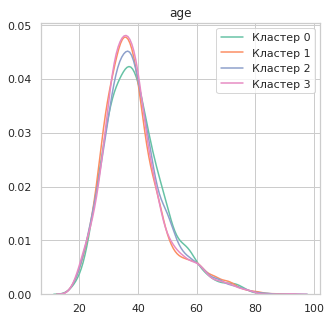

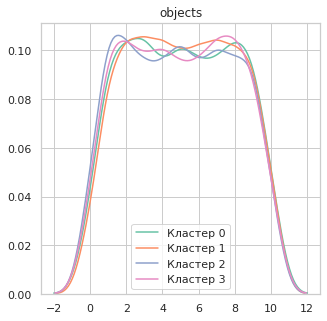

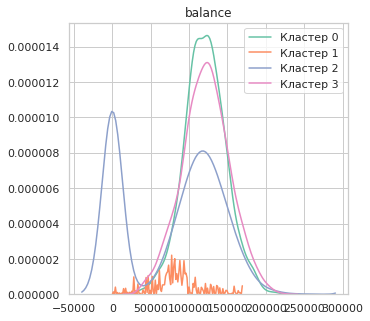

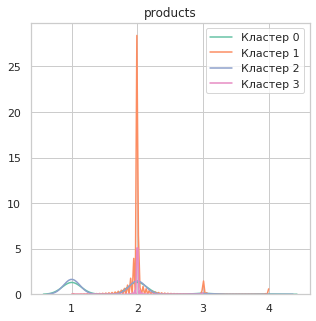

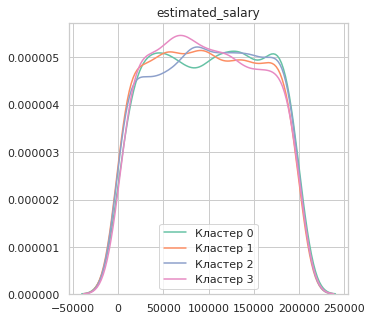

In [108]:
for column in ['score', 'city', 'age', 'objects', 'balance', 'products', 'estimated_salary']:
    plt.figure(figsize=(5, 5))
    plt.title(column)   
    sns.kdeplot(df.query('cluster==0')[column], label = 'Кластер 0')
    sns.kdeplot(df.query('cluster==1')[column], label = 'Кластер 1')
    sns.kdeplot(df.query('cluster==2')[column], label = 'Кластер 2')
    sns.kdeplot(df.query('cluster==3')[column], label = 'Кластер 3')
    
    sns.set_style('whitegrid')
    plt.legend()
    plt.show()

Тут мы видим, что по банковскому сокррингу кластеры примерно одинаковы. В самый отточный кластер номер 0 попали в основном жители Ростова Великого. Во втором кластере распределение по балансу счета имеет не нормальное распределение, а в первом кластере большие скачки. В кластере 1, который является самым стабильным расположились клиенты, пользующиеся 2 продуктами.

#### Посмотрим средние значения оттока в кластерах

In [109]:
df.groupby('cluster').agg({'churn':'mean'}).sort_values(by='churn')

,churn
cluster,
1,0.15
3,0.17
2,0.21
0,0.31


### Вывод  

- **Оптимальное число кластеров в данном случае 4**.  
- Самым стабильным оказался кластер номер 1, который вобрал в себя клиентов с признаками, которые были пределены ранее как характерные для клиентов не склонных уходить в отток.  
- Самым склонным к оттоку оказался кластер номер 0.

<a id='7'><a/> 
## 7. Общие выводы и рекомендации
[Назад к оглавлению](#back)

В данной выборке **10 000 уникальных клиентов**, живущих в 3 городах. Из них **80% лояльных** и **20% ушедших в отток**.  

Большая часть клиентов банка является людьми с высоким уровнем дохода (более 100 000 руб.), среднего возраста (30-55 лет), клиенты имеют 5 и более объектов во владении, со средним уровнем кредитного скоринга, по полу выборка распределена равномерно.  
По итогам исследования был выведен такой портрет клиентов склонных и не склонных к оттоку:  

### Признаки клиентов, которые склонны уходить в отток:
- клиенты проживают в Ростове Великом
- в отток чаще попадают женщины
- клиенты среднего возраста (около 35-40 лет). Так же стоит обратить внимание на клиентов пенсионного возраста, их всего 8% от общего числа клиентов в данной выборке, но в этой категории самый высокий процент оттока - 37% (от общего числа в этой категории).
- клиенты имеют более 5 объектов в собственности, таких клиентов больше всего в данной выборке. Стоит обратить внимание на - клиентов не имеющих объектов в собственности, тут отточников 23% (от общего числа в этой категории).
- клиенты со средним уровнем кредитного скоринга (менее 500 баллов), таких клиентов большинство в выборке. Стоит обратить внимание на клиентов с низким уровнем скоринга, среди них в отток уходит 23% (от общего числа в этой категории).
- неактивные клиенты
- у клиента есть кредитная карта
- клиенты с высоким уровнем дохода (более 100к).
- клиенты пользующиеся 3-4 продуктами (в случае 4 продуктов это 100%-ый отток).  

### Признаки клиентов, которые не склонны уходить в отток:
- клиенты проживающие в Рыбинске
- в большей массе это мужчины
- клиенты среднего возраста, их большинство в выборке. По категориям самые стабильные молодые клиенты (до 30 лет), их 92% лояльных.
- имеют более 5 объектов, внутри этой категории так же процент лояльности самый большой - 80%
- клиенты со средним уровнем кредитного скоринга, их большая чсть в выборке, однако по категориям самой лояльной категорией являются клиенты с высоким уровнем скора - 80% не в оттоке.
- активные клиенты
- с высоким достатком, однако внутри категорий более лояльными являются категории с низким и средним достатком, у них не в оттоке 80% клиентов внутри категорий.
- клиенты использующие 1-2 продукта.  

**Стоит обратить внимание** на то, что использование **более 2 продуктов - самый сильный признак у клиентов склонных к оттоку**. Так же важен пол (**женщины больше склонны к оттоку**). Есть статистически значимая разница в возрасте у лояльных и склонных к оттоку клиентов, разница составляет около 10 лет (**чем старше клиент, тем больше вероятность ухода в отток**). Большинство клиентов склонных к оттоку проживает в городе **Ростове Великом**.  

Так же стоит обратить внимание на признаки клиентов, склонных уходить в отток внутри категорий клиентов.  

В рамках анализа **были построены модели прогнозирования оттока клиентов и модель кластеризации**. Данные модели позволят с **вероятностью 88% прогнозировать отток** среди существующих и новых клиентов, что позволит принять меры по удержанию конкретных клиентов в будущем.  


### Рекомендации  

В ходе анализа были выявлены аномалии:  
- слишком низкий уровень дохода у некоторых клиентов, у которых на балансе крупные суммы и несколько объектов во владении. Если это результат выведения значений некой моделью, то стоит ее доработать
- у трети клиентов в выборке отсутствующие значения в столбце с балансом счета. Это может быть результатом того, что система так распознает тех, у кого нет дебетовой карты. Такие случаи выявлены только в двух городах -Ярославле и Рыбинске. Стоит изучить этот момент более детально 
- **при использовании 4 продуктов у клиентов 100% отток**, это явление так же стоит изучить более детально по данным других клиентов и принять какие-то меры по изучению продуктов, чтобы разработать стратегию по работе с новыми клиентами  
- для работы с клиентами наиболее склонными к оттоку внутри категорий можно разработать специальные предложения. Пример: для людей пенсионного возраста ввести льготы на продукты и услуги, так как они наиболее склонны к оттоку(в рамках своей категории)